<a href="https://colab.research.google.com/github/hvyrain/imis/blob/main/2023_2%EB%B9%85%ED%94%84%EA%B8%B0_%EC%A2%85%ED%95%A9%EB%B3%B5%EC%8A%B5_tips%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tips 데이터 셋을 이용한 데이터 분석
- tips : seaborn 내장 데이터
- 각 열(필드)의 의미를 챗GPT(https://chat.openai.com/)에서 알아 본다.
- 참고 사이트 : https://wikidocs.net/book/5011

## 차트에 한글 사용 설정

In [ ]:
%%shell
sudo apt-get install -y fonts-nanum*
sudo fc-cache -fv
rm ~/.cache/matplotlib -rf
# 설치 글꼴 목록 보기 : fc-list | grep -i nanum

In [ ]:
# 한글 글꼴 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic', size=14)
plt.rcParams['axes.unicode_minus'] = False

## tips 데이터셋 저장

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.to_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## csv 모듈 사용

### 데이터 파일 읽기

In [ ]:
# 데이터 파일 읽기
import csv
data = csv.reader(open('tips.csv'))
header = next(data)
print(header)

['', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


### 데이터 처리하기

In [ ]:
# total_bill과 tip 데이터를 반복하여 가져오기
bill = []
tip = []
for row in data :
  bill.append(float(row[1]))
  tip.append(float(row[2]))

print(bill)
print(tip)

[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29, 16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 19.65, 9.55, 18.35, 15.06, 20.69, 17.78, 24.06, 16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94, 9.68, 30.4, 18.29, 22.23, 32.4, 28.55, 18.04, 12.54, 10.29, 34.81, 9.94, 25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 16.45, 3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28, 14.73, 10.51, 17.92, 27.2, 22.76, 17.29, 19.44, 16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49, 5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 44.3, 22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.0, 7.25, 38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8, 8.52, 14.52, 11.38, 22.82, 19.08, 20.27, 11.17, 12.26, 18.26, 8.51, 10.33, 14.15, 16.0, 13.16, 17.47, 34.3, 41.19, 27.05, 16.43, 8.

### 결제금액, 팁 라인차트 그리기
- 라인 스타일 및 색상 : https://wikidocs.net/92083
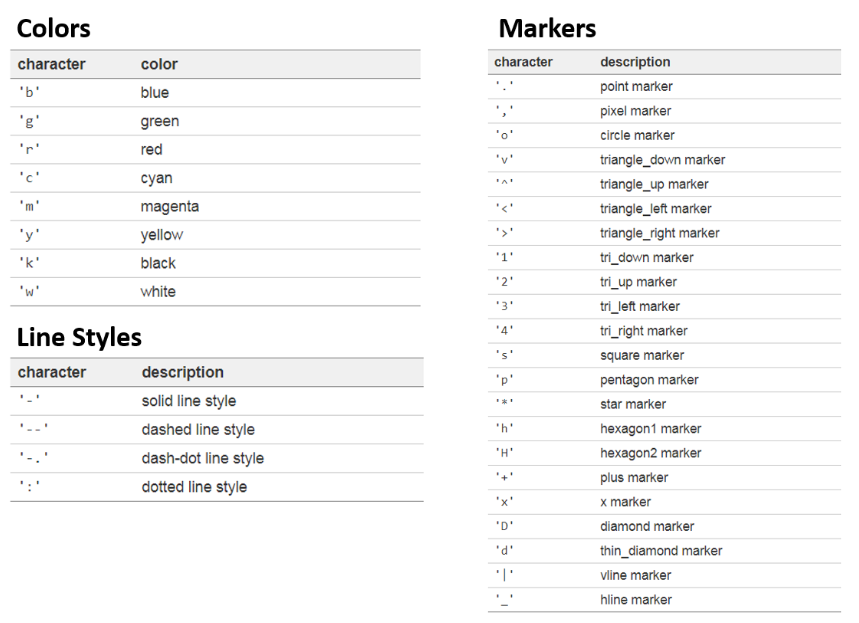

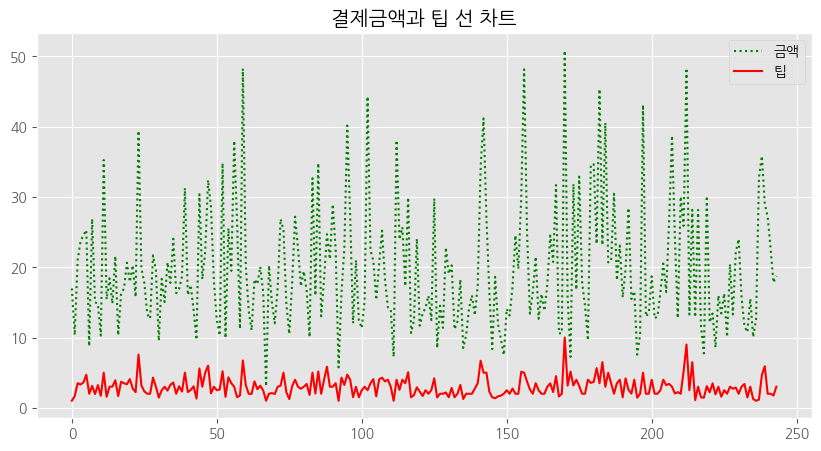

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('결제금액과 팁 선 차트')
plt.style.use('ggplot')
plt.plot(range(len(bill)), bill, 'g:', label='금액')
plt.plot(range(len(tip)), tip, 'r', label='팁')
plt.legend()
plt.show()

### 상자수염그림

In [ ]:
# 성별 팁 상자수염그림
import csv
data = csv.reader(open('tips.csv'))
header = next(data)
gender_bill = [[],[]]
gender_tip = [[],[]]

for row in data :
  if row[3] == 'Male' :
    gender_bill[0].append(float(row[1]))
    gender_tip[0].append(float(row[2]))
  else :
    gender_bill[1].append(float(row[1]))
    gender_tip[1].append(float(row[2]))

print(gender_bill, gender_tip)

[[10.34, 21.01, 23.68, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 15.42, 18.43, 21.58, 16.29, 20.65, 17.92, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 9.55, 18.35, 17.78, 24.06, 16.31, 18.69, 31.27, 16.04, 17.46, 13.94, 9.68, 30.4, 18.29, 22.23, 32.4, 28.55, 18.04, 12.54, 9.94, 25.56, 19.49, 38.01, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 20.23, 15.01, 12.02, 10.51, 17.92, 27.2, 22.76, 17.29, 19.44, 16.66, 32.68, 15.98, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49, 40.17, 27.28, 12.03, 21.01, 12.46, 15.36, 20.49, 25.21, 18.24, 14.0, 38.07, 23.95, 29.93, 11.69, 14.26, 15.95, 8.52, 22.82, 19.08, 16.0, 34.3, 41.19, 9.78, 7.51, 14.07, 13.13, 17.26, 24.55, 19.77, 48.17, 16.49, 21.5, 12.66, 13.81, 24.52, 20.76, 31.71, 50.81, 15.81, 7.25, 31.85, 16.82, 32.9, 17.89, 14.48, 34.63, 34.65, 23.33, 45.35, 23.17, 40.55, 20.69, 30.46, 23.1, 15.69, 28.44, 15.48, 16.58, 7.56, 10.34, 13.51, 18.71, 20.53, 26.59, 38.73, 24.27, 30.06, 25.89, 48.33, 28.15, 11.59, 7.74, 12.16, 8.58, 13.42, 20.45, 13.2

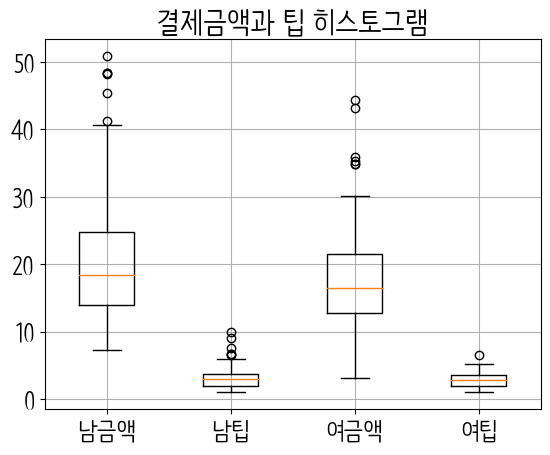

In [ ]:
import matplotlib.pyplot as plt
plt.title('결제금액과 팁 히스토그램')
plt.grid(True)
plt.boxplot([gender_bill[0], gender_tip[0], gender_bill[1], gender_tip[1]], labels=['남금액','남팁','여금액','여팁'])
plt.show()

### 히스토그램 그리기

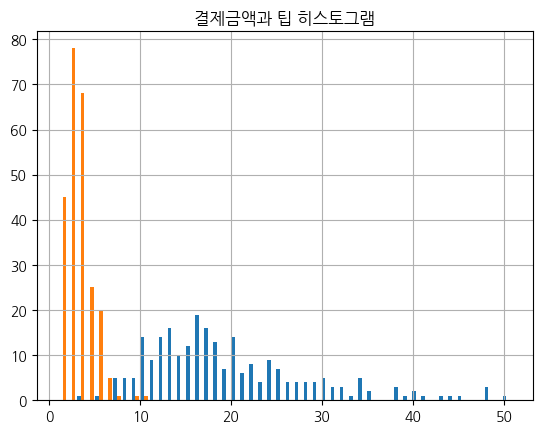

In [ ]:
import matplotlib.pyplot as plt
plt.title('결제금액과 팁 히스토그램')
plt.grid(True)
plt.hist([bill, tip], bins=50)
plt.show()

### 성별 결제금액 막대 차트

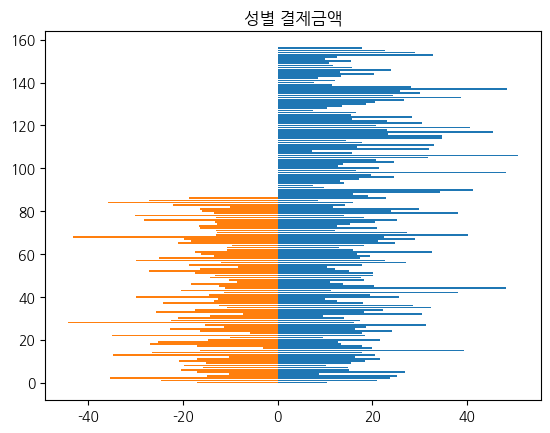

In [ ]:
import matplotlib.pyplot as plt
fbill1 = []
for i in fbill :
  fbill1.append(-i)

plt.title('성별 결제금액')
plt.barh(range(len(mbill)), mbill)
plt.barh(range(len(fbill1)), fbill1)
plt.show()

### 산점도 그리기

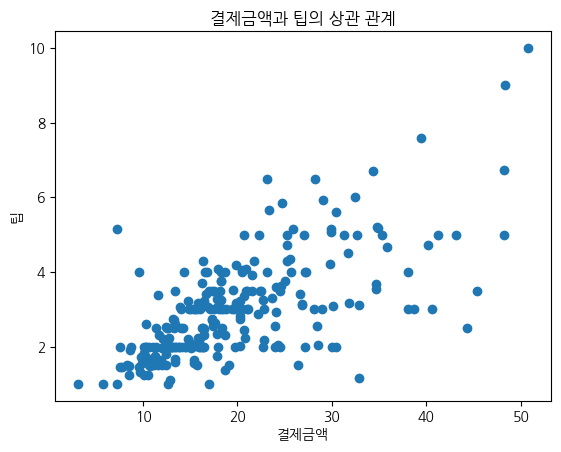

In [ ]:
# 산점도 그리기
import matplotlib.pyplot as plt
plt.title('결제금액과 팁의 상관 관계')
plt.scatter(bill, tip)
plt.xlabel('결제금액')
plt.ylabel('팁')
plt.show()

### 성별 결제금액-팁 산점도와 파이차트

In [ ]:
# total_bill과 tip 데이터를 반복하여 가져오기
mbill = []
mtip = []
fbill = []
ftip = []

for row in data :
  if row[3] == 'Male' :
    mbill.append(float(row[1]))
    mtip.append(float(row[2]))
  if row[3] == 'Female' :
    fbill.append(float(row[1]))
    ftip.append(float(row[2]))

print(mbill)
print(mtip)

[10.34, 21.01, 23.68, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 15.42, 18.43, 21.58, 16.29, 20.65, 17.92, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 9.55, 18.35, 17.78, 24.06, 16.31, 18.69, 31.27, 16.04, 17.46, 13.94, 9.68, 30.4, 18.29, 22.23, 32.4, 28.55, 18.04, 12.54, 9.94, 25.56, 19.49, 38.01, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 20.23, 15.01, 12.02, 10.51, 17.92, 27.2, 22.76, 17.29, 19.44, 16.66, 32.68, 15.98, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49, 40.17, 27.28, 12.03, 21.01, 12.46, 15.36, 20.49, 25.21, 18.24, 14.0, 38.07, 23.95, 29.93, 11.69, 14.26, 15.95, 8.52, 22.82, 19.08, 16.0, 34.3, 41.19, 9.78, 7.51, 14.07, 13.13, 17.26, 24.55, 19.77, 48.17, 16.49, 21.5, 12.66, 13.81, 24.52, 20.76, 31.71, 50.81, 15.81, 7.25, 31.85, 16.82, 32.9, 17.89, 14.48, 34.63, 34.65, 23.33, 45.35, 23.17, 40.55, 20.69, 30.46, 23.1, 15.69, 28.44, 15.48, 16.58, 7.56, 10.34, 13.51, 18.71, 20.53, 26.59, 38.73, 24.27, 30.06, 25.89, 48.33, 28.15, 11.59, 7.74, 12.16, 8.58, 13.42, 20.45, 13.28

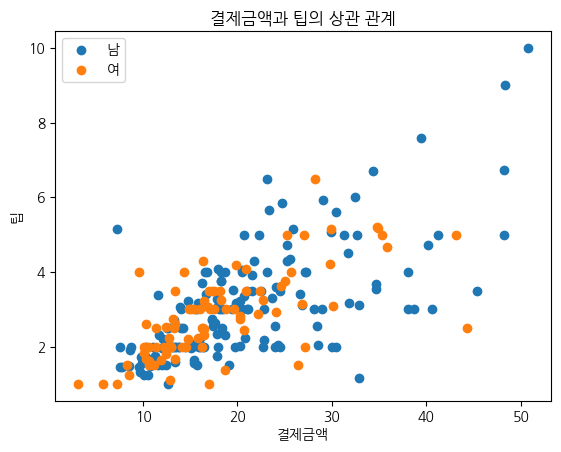

In [ ]:
# 산점도 그리기
import matplotlib.pyplot as plt
plt.title('결제금액과 팁의 상관 관계')
plt.scatter(mbill, mtip, label='남')
plt.scatter(fbill, ftip, label='여')
plt.legend()
plt.xlabel('결제금액')
plt.ylabel('팁')
plt.show()

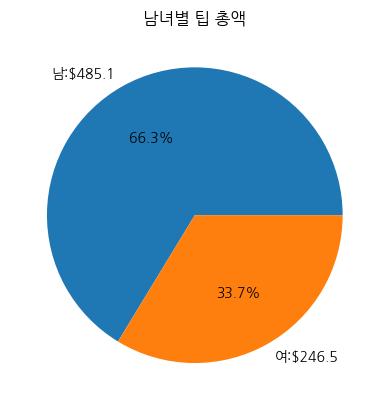

In [ ]:
# 성별 팁 파이차트 그리기
import matplotlib.pyplot as plt
plt.title('남녀별 팁 총액')
plt.pie([sum(mtip), sum(ftip)], labels=['남:$'+f'{sum(mtip):.1f}','여:$'+f'{sum(ftip):.1f}'], autopct='%.1f%%')
plt.show()

## penguins 데이터 셋을 이용한 연습
- seaborn의 penguins 데이터셋을 불러와서 다양한 차트로 그려본다.
- bill_length_mm 라인차트
- Adelie 펭귄의 성별 bill_length_mm 막대차트
- 펭귄 종류별 body_mass_g 상자수염그림
- 펭귄 종류별 body_mass_g 히스토그램
- bill_length_mm, bill_depth_mm 산점도 차트
- Gentoo 펭귄의 성별 flipper_length_mm의 평균 파이 차트
- 기타 등등

In [4]:
import seaborn as sns
pg = sns.load_dataset('penguins')
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## pandas, seaborn 사용

### 데이터 불러오기

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# 금액과 팁의 상관계수
tips[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


### pandas 라인 차트
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

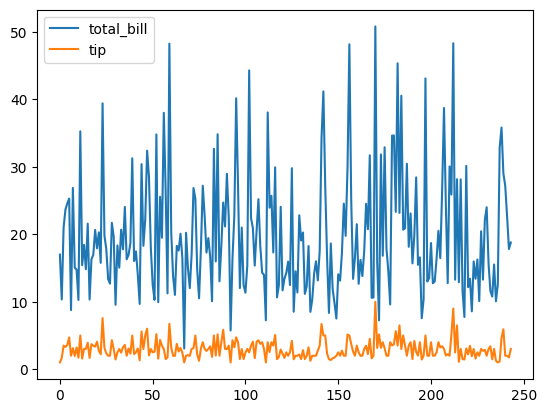

In [ ]:
import matplotlib.pyplot as plt
tips[['total_bill','tip']].plot()
plt.show()

### seaborn box/violin 차트
- https://seaborn.pydata.org/index.html

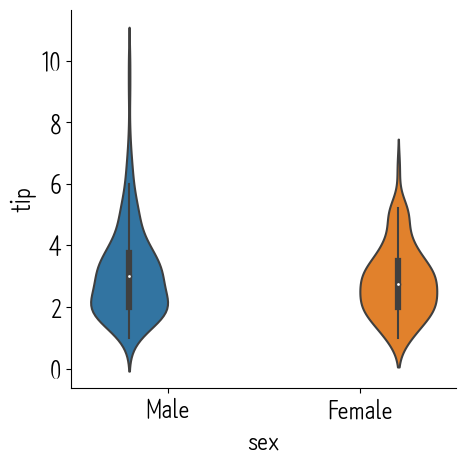

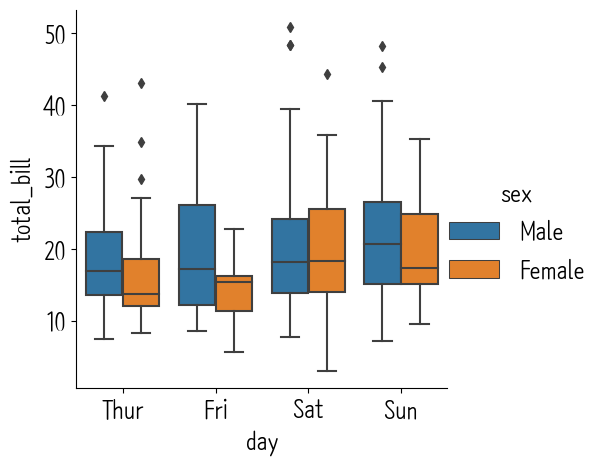

In [ ]:
sns.catplot(data=tips, x='sex', y='tip', hue='sex', kind='violin')
sns.catplot(data=tips, x='day', y='total_bill', hue='sex', kind='box')
plt.show()

### pandas 히스토그램

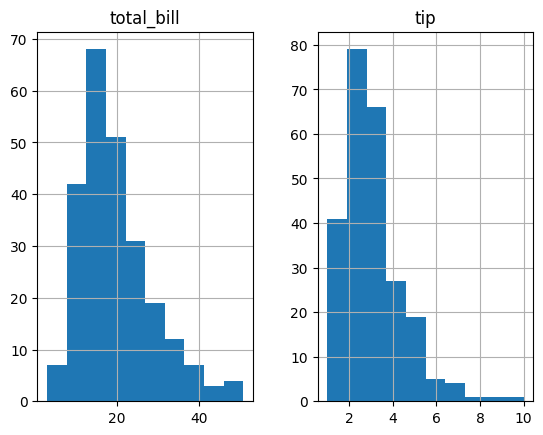

In [ ]:
tips[['total_bill','tip']].hist()
plt.show()

### seaborn 히스토그램

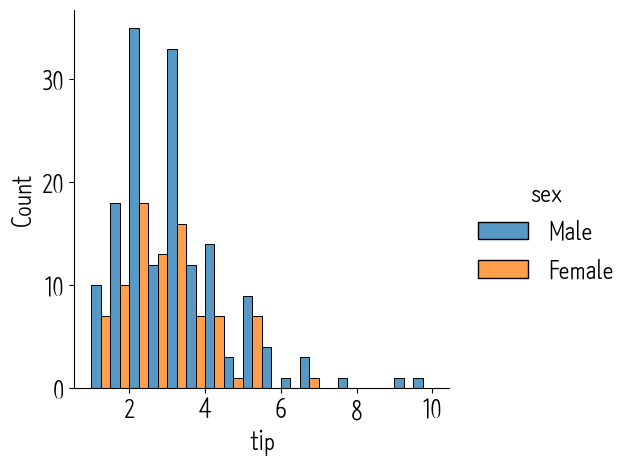

In [ ]:
sns.displot(data=tips, x='tip', hue='sex', multiple='dodge')
plt.show()

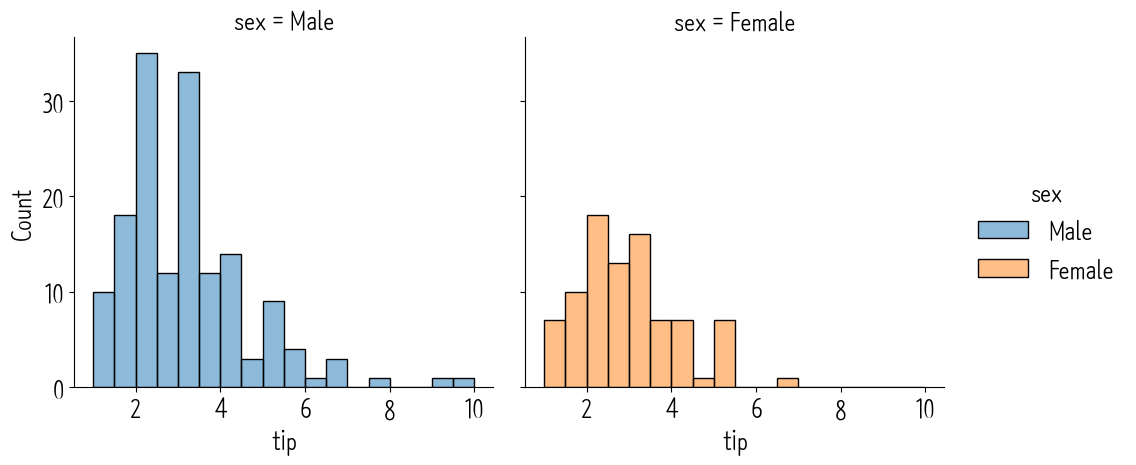

In [ ]:
sns.displot(data=tips, x='tip', hue='sex', col='sex')
plt.show()

### pandas 가로막대 차트

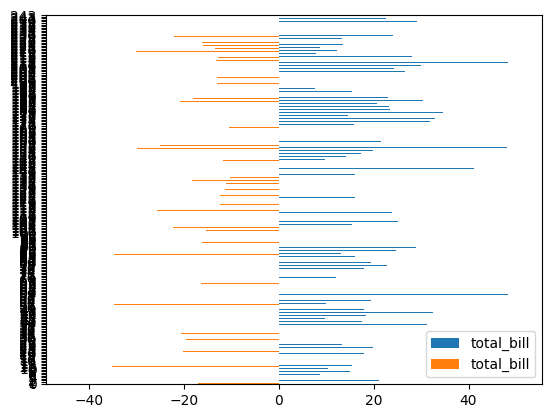

In [ ]:
import pandas as pd
m = tips[tips['sex']=='Male']['total_bill']
f = -tips[tips['sex']=='Female']['total_bill']
pd.concat([m,f], axis=1).sort_index().plot(kind='barh')
plt.show()

### pandas 산점도

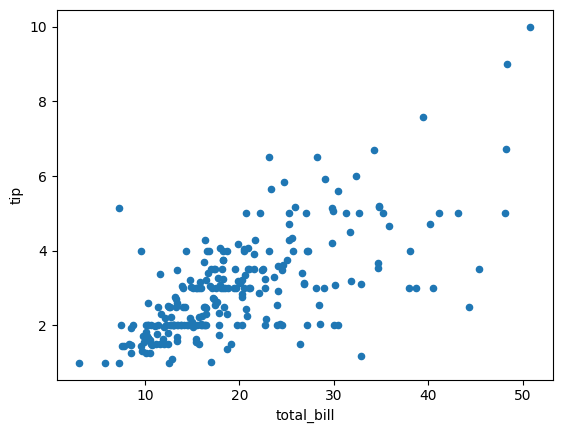

In [ ]:
tips[['total_bill','tip']].plot(kind='scatter', x='total_bill',y='tip')
plt.show()

### seaborn 성별 산점도

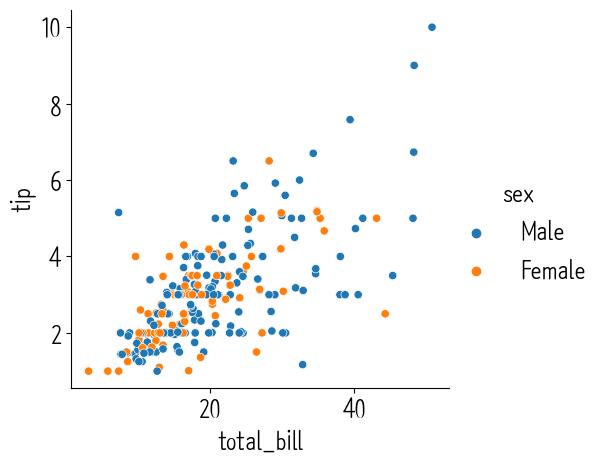

In [ ]:
import seaborn as sns
sns.relplot(data=tips,x='total_bill',y='tip',hue='sex')
plt.show()

### seaborn 회귀 차트

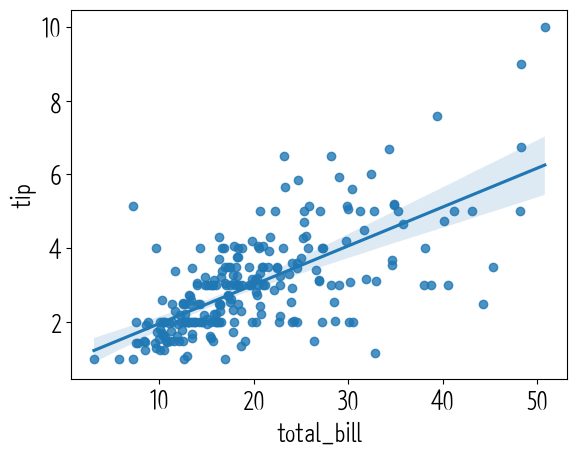

In [ ]:
import seaborn as sns
sns.regplot(data=tips,x='total_bill',y='tip')
plt.show()

### pandas 파이 차트

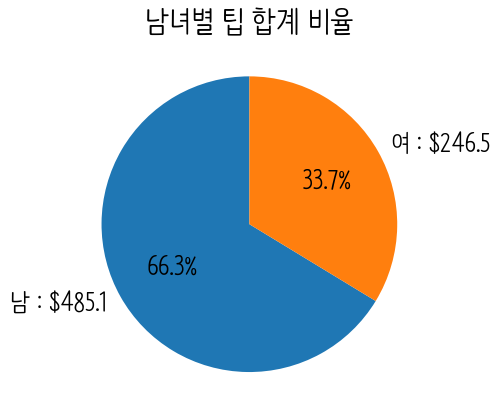

In [ ]:
msum = tips[tips['sex']=='Male'].tip.sum()
fsum = tips[tips['sex']=='Female'].tip.sum()
plt.title('남녀별 팁 합계 비율')
plt.pie([msum, fsum], labels=['남 : $'+f'{msum:.1f}','여 : $'+f'{fsum:.1f}'],
        autopct='%.1f%%', startangle=90)
plt.show()

In [ ]:
tips.groupby('sex').mean('tip')

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


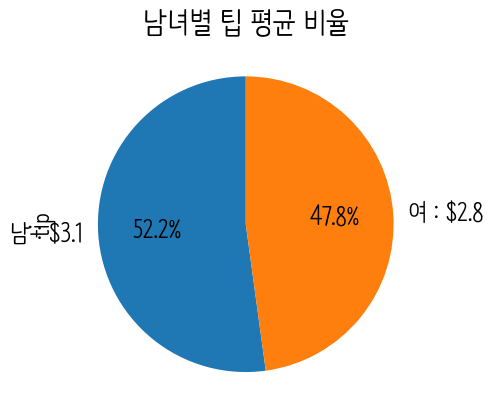

In [ ]:
total = tips.groupby('sex').mean('tip')
total.plot(y='tip', kind='pie',
        labels=['남 : $'+f'{total.iloc[0,1]:.1f}','여 : $'+f'{total.iloc[1,1]:.1f}'],
        legend=False, title='남녀별 팁 평균 비율', autopct='%.1f%%', startangle=90)
plt.show()

### 집계 - crosstab

In [ ]:
import pandas as pd
pd.crosstab(index=[tips.sex, tips.day], columns=[tips.time, tips.smoker], margins=True)

time        Lunch     Dinner       All
smoker        Yes  No    Yes   No     
sex    day                            
Male   Thur    10  20      0    0   30
       Fri      3   0      5    2   10
       Sat      0   0     27   32   59
       Sun      0   0     15   43   58
Female Thur     7  24      0    1   32
       Fri      3   1      4    1    9
       Sat      0   0     15   13   28
       Sun      0   0      4   14   18
All            23  45     70  106  244

In [ ]:
tips.groupby(['sex','day']).sum()

<ipython-input-15-d1f70aa43eac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['sex','day']).sum()


total_bill     tip  size
sex    day                           
Male   Thur      561.44   89.41    73
       Fri       198.57   26.93    21
       Sat      1227.35  181.95   156
       Sun      1269.46  186.78   163
Female Thur      534.89   82.42    79
       Fri       127.31   25.03    19
       Sat       551.05   78.45    63
       Sun       357.70   60.61    53